In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from DBM_HPC import DielectricBreakdown

Grid expanded from 200x200 to 250x250


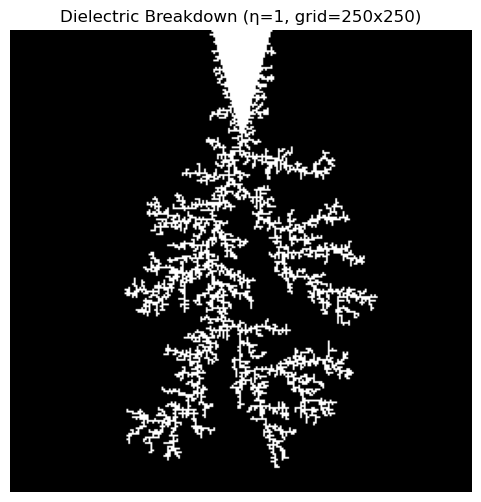

In [6]:
db = DielectricBreakdown(N=200, eta=1, triangle_theta=30, triangle_height=60)
db.simulate(max_steps=5000, save_lite = False, save_incremental=True, pickle_path="test.p")
db.plot_spark()

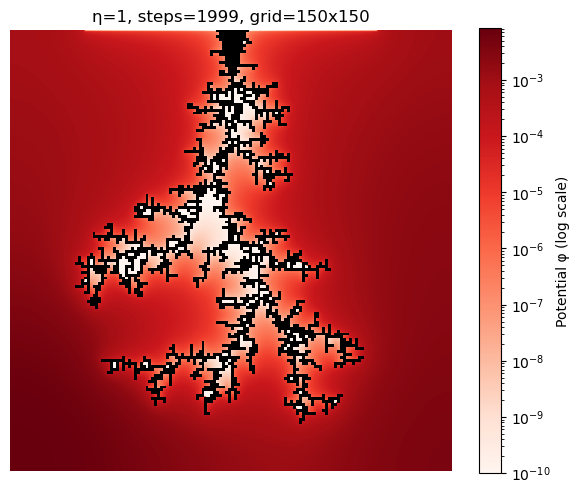

Fractal dimension D = 1.470


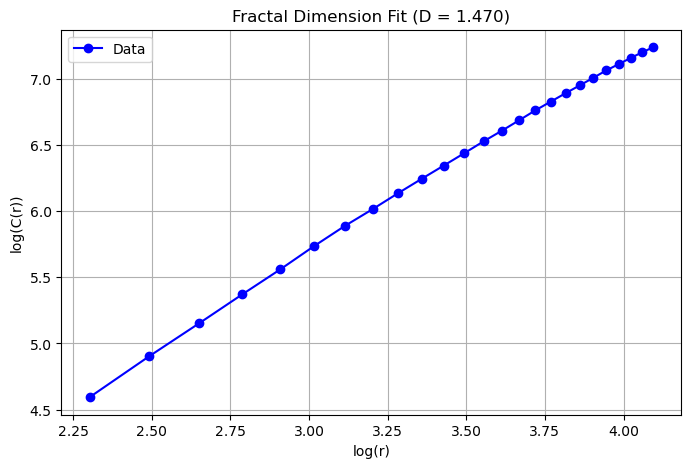

1.4696727788381705

In [56]:
db.calculate_fractal_dimension(r_min=10, r_max=60, num_r=25)

In [ ]:
db.theoretical_fractal_dimension(eta=1)

1.6666666666666667

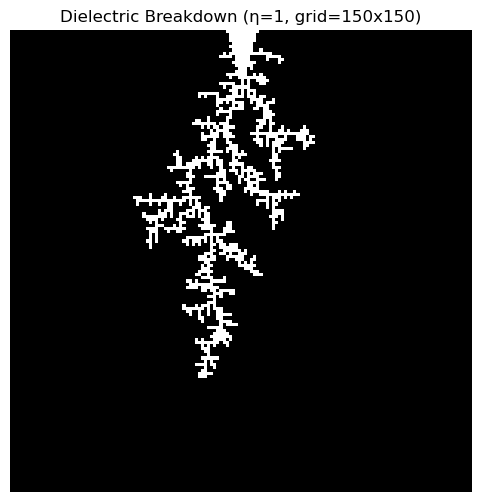

In [10]:
bd2 = DielectricBreakdown(
    N=100, 
    eta=1,
)

bd2.load_spark(pickle_path='data.pkl')
bd2.plot_spark()

# Loading in big simulations

In [11]:
import glob 
import numpy as np
import matplotlib.pyplot as plt 


infiles = glob.glob("data/*")
print(infiles)

['data/eta_10_theta_30_height_100_363.p', 'data/eta_18_theta_30_height_100_264.p', 'data/eta_2_theta_30_height_100_412.p', 'data/eta_14_theta_30_height_100_308.p', 'data/eta_6_theta_30_height_100_381.p']


In [ ]:
for f in infiles:
    eta = float(f.split('/')[-1].split('_')[1])/10 # Extract ETA from filename
    bd_temp = DielectricBreakdown(eta=eta)
    bd_temp.load_spark(pickle_path=f)
    #change the size of the grid based on what has been loaded
    bd_temp.N = bd_temp.spark.shape[0]
    sp = bd_temp.spark 
    fig, ax = plt.subplots(figsize=(20, 32), dpi=1000)
    h = ax.imshow(sp, cmap='gray', interpolation='nearest')
    #turn of axes
    ax.axis('off')
    plt.savefig("results/hpc/eta_{:d}.png".format(int(eta*10)), bbox_inches='tight', pad_inches=0)
